Получите и загрузите данные.
Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.
Снова загрузите полные данные.
Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.
Проверьте данные на наличие пропущенных значений.
a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.
b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.
Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
Проверьте данные на наличие выбросов.
a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.
*Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
*Попробуйте математически преобразовать признак Age.
Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.
Сформулируйте выводы по проделанной работе.
a) Кратко опишите какие преобразования были сделаны и почему.
b) Сравните метрики моделей из п. 2 и п. 10.
c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import math

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [3]:
data.dropna(inplace=True)
data.drop(["PassengerId", "Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1, inplace=True)
model_base = LogisticRegression()
X = data.drop("Survived", axis=1)
y = data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model_base.fit(X_train, y_train)
y_pred = model_base.predict(X_test)
accuracy_score(y_test, y_pred)

0.6756756756756757

Снова загрузите полные данные.
Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

In [61]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
columns_to_remove = [
    "PassengerId",  # идентификатор пассажира не может влиять на его выживание
    "Name",         # имя пассажира не может влиять на его выживание
    "Ticket",       # номер билета не может влиять на его выживание
    "Embarked",    # порт посадки не может влиять на его выживание
]
data.drop(columns=columns_to_remove, inplace=True)

Проверьте данные на наличие пропущенных значений.
a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.
b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [63]:
max_percent_of_nan = (data.isna().sum() / len(data) * 100).sort_values(ascending=False)[0]

In [64]:
# 77% пропусков для данных о возрасте - очень много
# лучше исключить этот признак из модели
data.drop(columns=["Age"], inplace=True)

In [65]:
# пропуски по каюте заменим на класс
data["Cabin"] = data["Cabin"].fillna("Unknown")
# заменим кабину на первую букву. это будет символом класса
data["Cabin"] = data["Cabin"].apply(lambda x: x[0])

Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.

In [66]:
data.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin
0,0,3,male,1,0,7.2500,U
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,U
3,1,1,female,1,0,53.1000,C
4,0,3,male,0,0,8.0500,U


In [67]:
columns_to_encode = ["Pclass", "SibSp", "Parch", "Cabin"]
data = pd.get_dummies(data, columns=columns_to_encode)

encoder = LabelEncoder()
data["Sex"] = encoder.fit_transform(data["Sex"])

data.head()

,Survived,Sex,Fare,Pclass_1,Pclass_2,Pclass_3,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_6,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,1,7.2500,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,71.2833,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,7.9250,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,53.1000,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,8.0500,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Проверьте данные на наличие выбросов.

<Axes: >

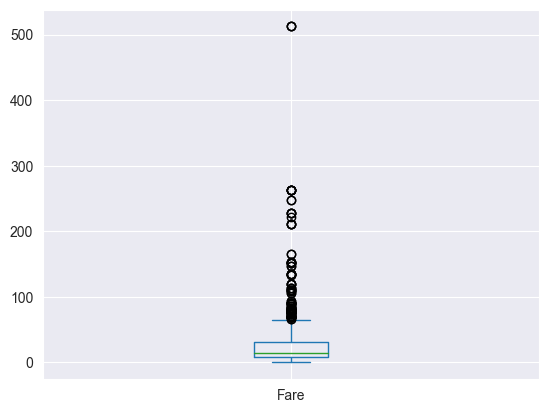

In [68]:
# есть только однак колонка, где могут быть выбросы - это Fare
# посмотрим на распределение
data["Fare"].plot(kind="box")

In [69]:
# заменим значения, которые выпадают за пределы 2-х сигм от среднеего значения
mean = data["Fare"].mean()
std = data["Fare"].std()
limit = mean + 2 * std
data["Fare"] = data["Fare"].apply(lambda x: limit if x > limit else x)

Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [70]:
model_2 = LogisticRegression()
X = data.drop("Survived", axis=1)
y = data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.776536312849162

In [71]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_2.fit(X_train_scaled, y_train)
y_pred = model_2.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7877094972067039

На данном этапе мы можем сделать вывод, что качество модели улучшилось.
Это связано с тем, что мы
- удалили признаки, которые не влияют на выживаемость пассажира
- удалили признаки, которые содержат много пропусков
- заменили пропуски в каюте на класс
- перевели категориальные признаки в числовые
Также, удалось добиться небольшого улучшения качества модели за счет нормализации данных